## This jupyter notebook plots homograpy images and saves homograpy matrix 

### Output naming rules:
1. *_vtg_* : mapping from video's image to google map screenshot
2. *_gtv_* : mapping from google map screenshot to video's image

In [1]:
import cv2
import json
import shutil
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_pts_array(points):
    nb_pts = len(points)
    pts_array = np.zeros((nb_pts, 2))
    for i in range(1, nb_pts + 1):
        point = points[str(i)]
        pts_array[i-1][0] = point['x']
        pts_array[i-1][1] = point['y']
    return pts_array

In [3]:
# Load metadata
with open("./img_coordinates.json") as json_file:
    meta = json.load(json_file)
real_scenes = meta['google_imgs']
scenes = meta["sample"]

# Generate homography, save images and save matrix to .npy
matrix_folder = "homography_matrix"
image_output_folder = "homography_images"

if not os.path.isdir(matrix_folder) or not os.path.isdir(image_output_folder):
    os.mkdir(matrix_folder)
    os.mkdir(image_output_folder)

for k, v in scenes.items():
    real_s = k[:-2]
    pts_dest = get_pts_array(real_scenes[real_s]['points'])
    img_dest = cv2.imread('google_images/' + real_s + '.png')
    
    img_src = cv2.imread("video_images/" + k + '_000001.jpg')
    pts_src = get_pts_array(v)
    
    
    # Find and save the homography matrix and image from video's image to google map screenshot
    h_vtg, _ = cv2.findHomography(pts_src, pts_dest)
    print("Save homograpy matrix to {}".format(matrix_folder + "/" + k + "_vtg.npy"))        
    np.save(matrix_folder + "/" + k + "_vtg.npy", h_vtg )
    
    img_out = cv2.warpPerspective(img_src, h_vtg, (img_dest.shape[1],img_dest.shape[0]))
    print("Save homograyp image to {}".format(image_output_folder +"/" + k + "_homo_vtg.jpg"))
    cv2.imwrite(image_output_folder +"/" + k + "_homo_vtg.jpg" ,img_out)                 
    
    # Find and save the homography matrix and image from google map screenshot to video's image
    h_gtv, _ = cv2.findHomography(pts_dest, pts_src)
    print("Save homograpy matrix to {}".format(matrix_folder + "/" + k + "_vtg.npy"))        
    np.save(matrix_folder + "/" + k + "_gtv.npy", h_gtv )
    
    
    img_out = cv2.warpPerspective(img_dest, h_gtv, (img_src.shape[1],img_src.shape[0]))
    print("Save homograyp image to {}".format(image_output_folder +"/" + k + "_homo_gtv.jpg"))
    cv2.imwrite(image_output_folder +"/" + k + "_homo_gtv.jpg" ,img_out)                 
    
    

Save homograpy matrix to homography_matrix/Echabdens_Route_de_la_Gare_1_vtg.npy
Save homograyp image to homography_images/Echabdens_Route_de_la_Gare_1_homo_vtg.jpg
Save homograpy matrix to homography_matrix/Echabdens_Route_de_la_Gare_1_vtg.npy
Save homograyp image to homography_images/Echabdens_Route_de_la_Gare_1_homo_gtv.jpg
Save homograpy matrix to homography_matrix/Echabdens_Route_de_la_Gare_2_vtg.npy
Save homograyp image to homography_images/Echabdens_Route_de_la_Gare_2_homo_vtg.jpg
Save homograpy matrix to homography_matrix/Echabdens_Route_de_la_Gare_2_vtg.npy
Save homograyp image to homography_images/Echabdens_Route_de_la_Gare_2_homo_gtv.jpg
Save homograpy matrix to homography_matrix/Echabdens_Route_de_la_Gare_3_vtg.npy
Save homograyp image to homography_images/Echabdens_Route_de_la_Gare_3_homo_vtg.jpg
Save homograpy matrix to homography_matrix/Echabdens_Route_de_la_Gare_3_vtg.npy
Save homograyp image to homography_images/Echabdens_Route_de_la_Gare_3_homo_gtv.jpg
Save homograpy m

### Example of one scene  - "Echabdens_Route_de_la_Gare"

### Load metadata

In [4]:
# Load metadata
with open("./img_coordinates.json") as json_file:
    meta = json.load(json_file)
real_scenes = meta['google_imgs']
scenes = meta["sample"]
dest = 'Echabdens_Route_de_la_Gare.jpg'


### Show google image

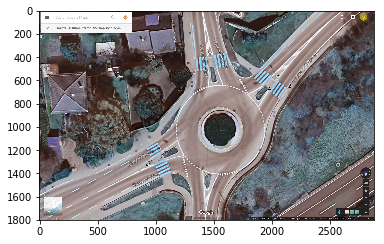

In [5]:
img_dest = cv2.imread('google_images/' + dest)
pts_dest = get_pts_array(real_scenes[dest[:-4]]["points"])
plt.imshow(img_dest)

### Show video's image

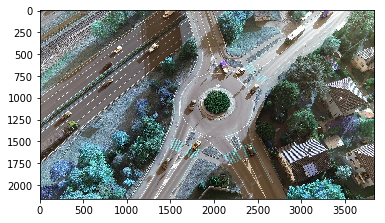

In [6]:
img_src = cv2.imread("video_images/" + dest[:-4] + "_1_000001.jpg")
pts_src = get_pts_array(scenes[dest[:-4] + "_1"])
plt.imshow(img_src)

### Map  video's image to google image

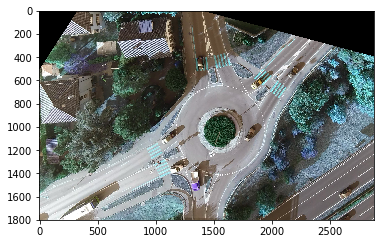

In [7]:
h, status = cv2.findHomography(pts_src, pts_dest)
im_out = cv2.warpPerspective(img_src, h, (img_dest.shape[1],img_dest.shape[0]))
plt.imshow(im_out)

### Map google image to video's image

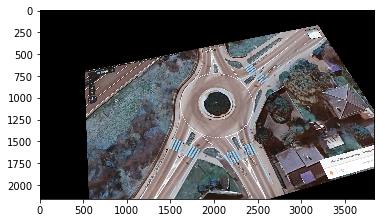

In [8]:
h, status = cv2.findHomography(pts_dest, pts_src)
im_out = cv2.warpPerspective(img_dest, h, (img_src.shape[1],img_src.shape[0]))
plt.imshow(im_out)